In [6]:
!pip install fbprophet

In [0]:
import os
from datetime import datetime
from statsmodels.datasets import co2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fbprophet import Prophet

In [0]:
df = co2.load_pandas().data

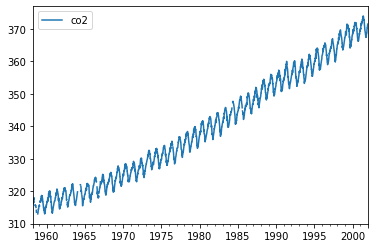

In [4]:
df.plot()

In [0]:
df['ds'] = df.index

In [0]:
df['y'] = df['co2']

In [42]:
p = Prophet()
p.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [43]:
future = p.make_future_dataframe(periods=365*20)
future.tail()

,ds
9579,2021-12-20
9580,2021-12-21
9581,2021-12-22
9582,2021-12-23
9583,2021-12-24


In [0]:
forecast = p.predict(future)

In [45]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
9579,2021-12-20,407.418531,372.748259,441.320102,373.240387,441.725003,-0.773758,-0.773758,-0.773758,-0.773758,-0.773758,-0.773758,0.0,0.0,0.0,406.644772
9580,2021-12-21,407.423365,372.592817,441.327958,373.240764,441.735265,-0.740293,-0.740293,-0.740293,-0.740293,-0.740293,-0.740293,0.0,0.0,0.0,406.683072
9581,2021-12-22,407.428199,372.616452,441.018196,373.241141,441.745527,-0.706546,-0.706546,-0.706546,-0.706546,-0.706546,-0.706546,0.0,0.0,0.0,406.721654
9582,2021-12-23,407.433034,372.533979,441.108732,373.241519,441.755789,-0.672576,-0.672576,-0.672576,-0.672576,-0.672576,-0.672576,0.0,0.0,0.0,406.760458
9583,2021-12-24,407.437868,372.803147,441.597020,373.241896,441.766051,-0.638455,-0.638455,-0.638455,-0.638455,-0.638455,-0.638455,0.0,0.0,0.0,406.799413


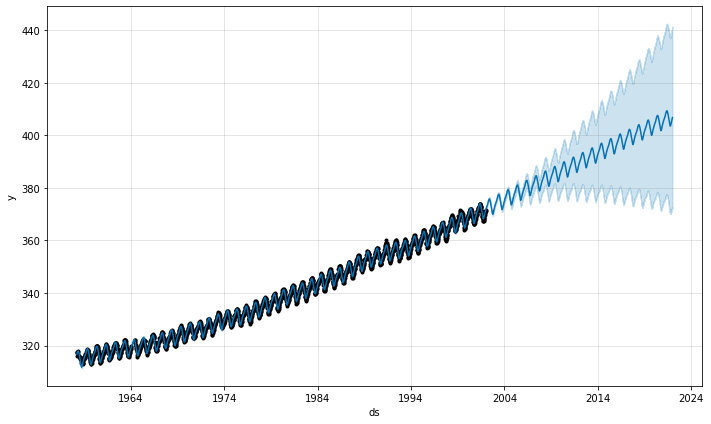

In [46]:
_ = p.plot(forecast)

In [22]:
len(df)

2284

In [30]:
df_stockprice_7203 = pd.read_csv('s3://fin-app/stockprice_concat/7203.csv')

INFO:botocore.credentials:Found credentials in environment variables.


In [32]:
df_stockprice_7203.head()

,日付,始値,高値,安値,終値,出来高,終値調整値
0,1983-01-04,1100,1110,1090,1090,1188000,741.1
1,1983-01-05,1100,1100,1060,1080,1116000,734.3
2,1983-01-06,1060,1070,1040,1050,1477999,713.9
3,1983-01-07,1070,1080,1050,1070,1227000,727.5
4,1983-01-08,1070,1070,1060,1070,743000,727.5


In [0]:
df_stockprice_7203['ds'] = pd.to_datetime(df_stockprice_7203['日付'])

In [0]:
df_stockprice_7203['y'] = df_stockprice_7203['終値']

In [36]:
p = Prophet()
p.fit(df_stockprice_7203)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [37]:
future = p.make_future_dataframe(periods=365*5)
future.tail()

,ds
11107,2024-12-07
11108,2024-12-08
11109,2024-12-09
11110,2024-12-10
11111,2024-12-11


In [0]:
forecast = p.predict(future)

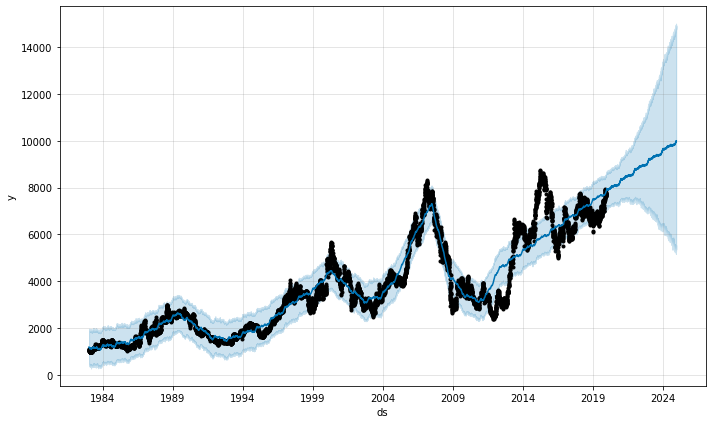

In [41]:
_ = p.plot(forecast)

In [0]:
df_train = df_stockprice_7203[df_stockprice_7203['ds'] < '2005-01-01']
df_test = df_stockprice_7203[df_stockprice_7203['ds'] >= '2005-01-01']

In [51]:
p = Prophet()
p.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [52]:
future = p.make_future_dataframe(periods=365*20)
future.tail()

,ds
12923,2024-12-21
12924,2024-12-22
12925,2024-12-23
12926,2024-12-24
12927,2024-12-25


In [0]:
forecast = p.predict(future)

In [54]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1983-01-04,1113.124767,753.228047,1553.746360,1113.124767,1113.124767,35.319340,35.319340,35.319340,4.793801,4.793801,4.793801,30.525539,30.525539,30.525539,0.0,0.0,0.0,1148.444106
1,1983-01-05,1113.479147,718.951495,1531.029016,1113.479147,1113.479147,28.533448,28.533448,28.533448,2.423535,2.423535,2.423535,26.109913,26.109913,26.109913,0.0,0.0,0.0,1142.012595
2,1983-01-06,1113.833528,731.466424,1557.786785,1113.833528,1113.833528,22.856082,22.856082,22.856082,1.546300,1.546300,1.546300,21.309782,21.309782,21.309782,0.0,0.0,0.0,1136.689610
3,1983-01-07,1114.187909,702.009542,1527.425321,1114.187909,1114.187909,18.702912,18.702912,18.702912,2.498299,2.498299,2.498299,16.204613,16.204613,16.204613,0.0,0.0,0.0,1132.890821
4,1983-01-08,1114.542289,696.986396,1523.172890,1114.542289,1114.542289,9.697455,9.697455,9.697455,-1.180150,-1.180150,-1.180150,10.877605,10.877605,10.877605,0.0,0.0,0.0,1124.239744


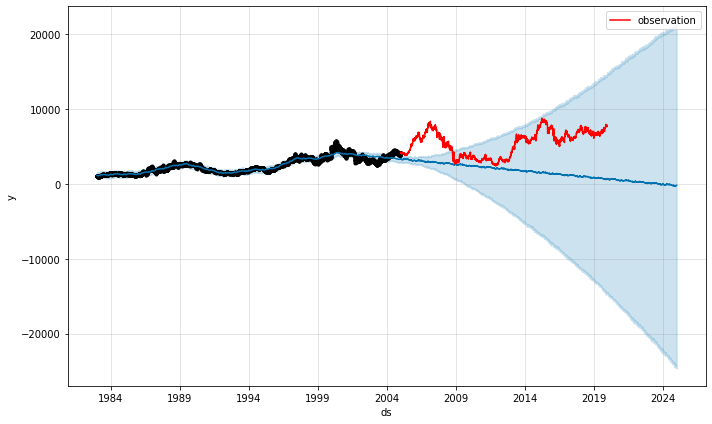

In [59]:
_ = p.plot(forecast)
plt.plot(df_test['ds'], df_test['y'], c='red', label='observation')
plt.legend()

(2000, 8000)

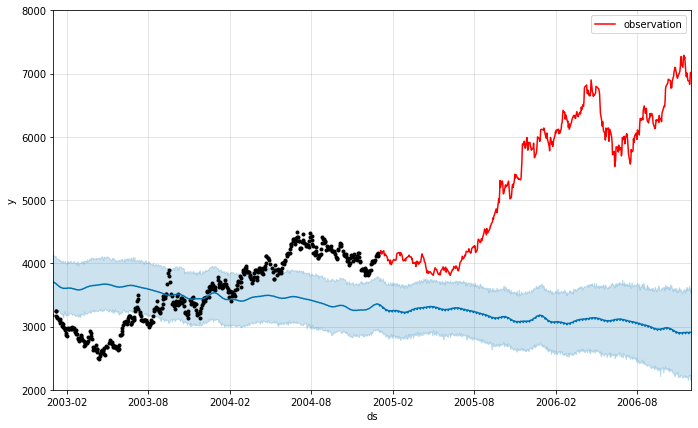

In [68]:
_ = p.plot(forecast)
plt.plot(df_test['ds'], df_test['y'], c='red', label='observation')
plt.legend()
plt.xlim(datetime(2003, 1, 1), datetime(2006, 12, 1))
plt.ylim(2000, 8000)